Nome da aluna(o) [primeiro + último]: Maria Carolina Tavares

Número da aluna(o) : 2021143176

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df_measurements = pd.read_csv("measurements.csv")
df_measurements.head(3)

,measurement_time,gadget_id,vibration_x,vibration_y,pressure,temperature,Unnamed: 10,Unnamed: 11
0,2020-07-15 00:00:00.000,1,3,7,16.0,44.114437,NaN,NaN
1,2020-07-15 01:00:00.000,1,8,3,12.0,34.395177,NaN,NaN
2,2020-07-15 01:59:59.990,1,10,8,20.0,38.280705,NaN,NaN


Q1 - Efectuar o parsing do campo measurement_time para datetime

In [4]:
df_measurements = pd.read_csv("measurements.csv", parse_dates=['measurement_time'])
df_measurements.head(3)

,measurement_time,gadget_id,vibration_x,vibration_y,pressure,temperature,Unnamed: 10,Unnamed: 11
0,2020-07-15 00:00:00.000,1,3,7,16.0,44.114437,NaN,NaN
1,2020-07-15 01:00:00.000,1,8,3,12.0,34.395177,NaN,NaN
2,2020-07-15 01:59:59.990,1,10,8,20.0,38.280705,NaN,NaN


In [5]:
df_measurements.dtypes

measurement_time    datetime64[ns]
gadget_id                    int64
vibration_x                  int64
vibration_y                  int64
pressure                   float64
temperature                float64
Unnamed: 10                float64
Unnamed: 11                float64
dtype: object

Q2 - Retirar definitivamente (drop) os campos unnamed* do dataframe

In [7]:
df_measurements.drop(["Unnamed: 10", "Unnamed: 11"], axis=1, inplace=True)
df_measurements.head(3)

,measurement_time,gadget_id,vibration_x,vibration_y,pressure,temperature
0,2020-07-15 00:00:00.000,1,3,7,16.0,44.114437
1,2020-07-15 01:00:00.000,1,8,3,12.0,34.395177
2,2020-07-15 01:59:59.990,1,10,8,20.0,38.280705


Q3 - Ordenar o dataframe de forma ascendente pelo campo measurement_time

In [9]:
df_measurements = df_measurements.sort_values(by=['measurement_time'], ascending=[True])
df_measurements.head(5)

,measurement_time,gadget_id,vibration_x,vibration_y,pressure,temperature
0,2020-07-15,1,3,7,16.0,44.114437
336,2020-07-15,3,3,8,11.0,40.427740
168,2020-07-15,2,3,10,16.0,22.300000
840,2020-07-15,6,7,6,12.0,75.874521
672,2020-07-15,5,4,7,12.0,81.125342


Q4 - Escreva a função para obter estas estatísticas descritivas (novo dataframe)

In [10]:
result=df_measurements.describe()
result

,gadget_id,vibration_x,vibration_y,pressure,temperature
count,1008.000000,1008.000000,1008.000000,1008.000000,1008.000000
mean,3.500000,5.508929,5.439484,14.979167,59.813215
std,1.708673,2.657533,2.727678,2.516295,22.320829
min,1.000000,1.000000,0.000000,10.000000,11.463147
25%,2.000000,3.000000,3.000000,12.500000,37.091100
50%,3.500000,6.000000,5.000000,15.000000,71.200480
75%,5.000000,8.000000,7.000000,16.000000,77.606296
max,6.000000,10.000000,10.000000,20.000000,109.816490


Q5 - Qual o valor do desvio padrão (std) do campo temperature ? (guarde-o numa variavel)

In [11]:
std_temperature=result.loc["std","temperature"]
std_temperature

22.32082924549669

Q6 - Qual o valor da média (mean) do campo temperature(PRESSURE*) ? (guarde-o numa variavel)

In [12]:
mean_pressure=result.loc["mean","pressure"]
mean_pressure

14.979166666666666

Q7 - Falha é um estado quando se verificam as condições (&)

vibration_y >= 7
temperature > que o valor std do campo temperature
pressure > que o valor mean do campo pressure
escreva o código para obtermos esses registos

In [22]:
result1 = df_measurements[(df_measurements.vibration_y>=7) & (df_measurements.temperature>std_temperature) & (df_measurements.pressure>mean_pressure)]
result1.head(5)

,measurement_time,gadget_id,vibration_x,vibration_y,pressure,temperature
0,2020-07-15 00:00:00.000,1,3,7,16.0,44.114437
337,2020-07-15 01:00:00.000,3,9,9,19.0,39.084426
2,2020-07-15 01:59:59.990,1,10,8,20.0,38.280705
676,2020-07-15 03:59:59.980,5,7,9,16.0,72.612199
4,2020-07-15 03:59:59.980,1,6,9,16.0,39.257268


In [19]:
df_failures = pd.read_csv("failures.csv", parse_dates=['failure_time'])
df_failures.head(5)

,failure_time,gadget_id
0,2020-07-15 09:56:03.974006640,1
1,2020-07-15 21:49:25.197701400,1
2,2020-07-16 00:51:15.832103640,1
3,2020-07-16 01:11:46.349668720,1
4,2020-07-16 02:22:18.964504160,1


In [18]:
df_failures = df_failures.sort_values(by=['failure_time'], ascending=[True])
df_failures.head()

,failure_time,gadget_id
52,2020-07-15 05:31:44.776014200,4
72,2020-07-15 05:48:58.383388460,5
53,2020-07-15 06:42:44.569051620,4
14,2020-07-15 07:11:50.319233260,2
39,2020-07-15 09:33:48.330967860,3


Q8 - Efectue o agupamento (groupby) pelo campo gadget_id e calcule (cont) a quantidade de ocorrência de cada tipo de gadget

In [20]:
result2=df_failures.groupby(["gadget_id"]).count()
result2

,failure_time
gadget_id,
1,14
2,25
3,13
4,20
5,25
6,8


Q9 - Crie uma gráfico com os dados de objecto (groupby): barras, sem legenda e um título

<AxesSubplot:title={'center':'Failures'}, xlabel='gadget_id'>

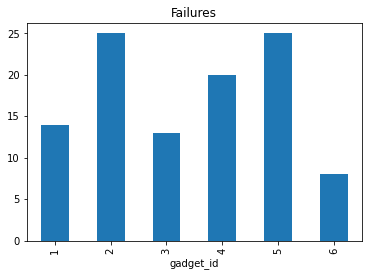

In [21]:
result2.plot.bar(title="Failures", legend=False)